 ### スネルの法則
 
 \begin{align}
 \frac{n_1}{n_2} = \frac{\sin \theta_1}{\sin \theta_2} \\
 \end{align}

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import math

In [5]:
def snell(n1, n2, rad1):
    sin2 = math.sin(rad1) * n2 / n1
    if sin2 <= 1.0 and sin2 >= -1.0:
        return math.asin(sin2)
    else:
        return -rad1

In [6]:
# 屈折率n
WATER_N = 1.333
GLASS_N = 1.5
AIR_N = 1.0

In [13]:
def snell_plot(n1, n2, deg1, plt):
    r90 = math.pi / 2.0
    rad1 = math.radians(deg1)
    rad2 = snell(n1, n2, rad1)
    if rad2 >= 0.0:
        x = [-math.cos(r90 - rad1), 0, math.cos(r90 - rad2)]
        y = [math.sin(r90 - rad1), 0, -math.sin(r90 - rad2)]
    else:
        ref = - rad2
        x = [-math.cos(r90 - rad1), 0, math.cos(r90 - ref)]
        y = [math.sin(r90 - rad1), 0, math.sin(r90 - ref)]
    deg2 = math.degrees(rad2)
    text = str(deg1) + " -> " + "{0:.2f}".format(deg2) + "[deg]"
    plt.plot(x, y, label=text)

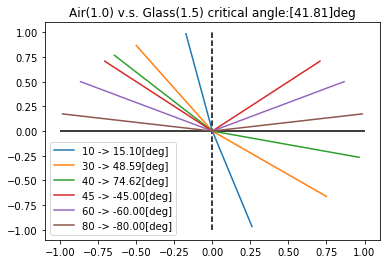

In [17]:
snell_plot(AIR_N, GLASS_N, 10, plt)
snell_plot(AIR_N, GLASS_N, 30, plt)
snell_plot(AIR_N, GLASS_N, 40, plt)
snell_plot(AIR_N, GLASS_N, 45, plt)
snell_plot(AIR_N, GLASS_N, 60, plt)
snell_plot(AIR_N, GLASS_N, 80, plt)
plt.hlines([0], -1, 1)
plt.vlines([0], -1, 1, linestyles="dashed")
plt.legend()
plt.title("Air(1.0) v.s. Glass(1.5) critical angle:[{0:.2f}]deg".format(math.degrees(math.asin(AIR_N/GLASS_N))))
plt.show()

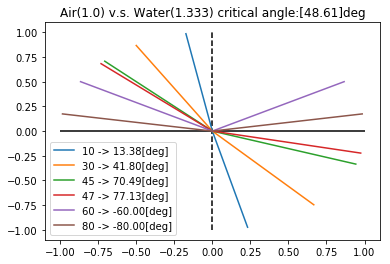

In [16]:
snell_plot(AIR_N, WATER_N, 10, plt)
snell_plot(AIR_N, WATER_N, 30, plt)
snell_plot(AIR_N, WATER_N, 45, plt)
snell_plot(AIR_N, WATER_N, 47, plt)
snell_plot(AIR_N, WATER_N, 60, plt)
snell_plot(AIR_N, WATER_N, 80, plt)
plt.hlines([0], -1, 1)
plt.vlines([0], -1, 1, linestyles="dashed")
plt.legend()
plt.title("Air(1.0) v.s. Water(1.333) critical angle:[{0:.2f}]deg".format(math.degrees(math.asin(AIR_N/WATER_N))))
plt.show()

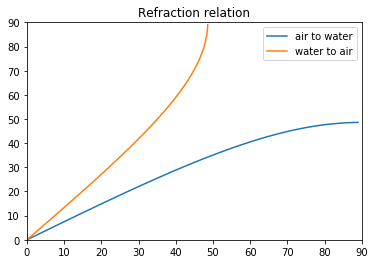

In [18]:
Incidence = []
Refraction= []
for d in range(90):
    rad1 = math.radians(d)
    rad2 = snell(WATER_N, AIR_N, rad1)
    d2 = math.degrees(rad2)
    Incidence.append(d)
    Refraction.append(d2)
plt.plot(Incidence, Refraction, label="air to water")
plt.plot(Refraction, Incidence, label="water to air")
plt.xlim(0,90)
plt.ylim(0,90)
plt.title("Refraction relation")
plt.legend()
plt.show()